## Importing libraries

In [4]:
import numpy as np
import pandas as pd

try:
    import apyori
except:
    %pip install apyori

from apyori import apriori

## Loading Dataset

In [7]:
df = pd.read_csv(Groceries_dataset.csv, parse_dates=['Date'])
df.head()

NameError: name 'Groceries_dataset' is not defined

### Any null values

In [3]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

### Total Products

In [4]:
all_products = df['itemDescription'].unique()
print("Total products: {}".format(len(all_products)))

Total products: 167


## Top 10 frequently sold products

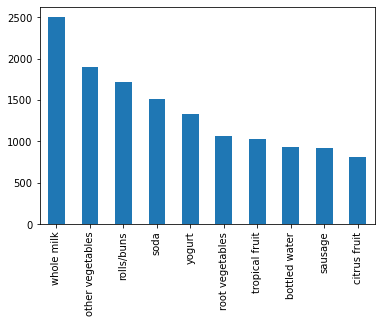

In [5]:
df['itemDescription'].value_counts().sort_values(ascending = False)[:10].plot(kind= 'bar')

### One-hot representation of products purchased

In [6]:
df = pd.get_dummies(df,prefix='' , prefix_sep='')
df.head()

,Member_number,Date,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,2015-07-21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,2015-05-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,2015-09-19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,2015-12-12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,2015-01-02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Transactions


In [7]:
df.groupby(["Member_number","Date"])[all_products].sum().reset_index()[all_products]

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
records = df.groupby(["Member_number","Date"])[all_products[:]].apply(sum)
records = records.reset_index()[all_products]

In [9]:
records

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
## Replacing non-zero values with product names
def get_Pnames(x):
    for product in all_products:
        if x[product] > 0:
            x[product] = product
    return x

records = records.apply(get_Pnames, axis=1)
records.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
rec_list= records.values.tolist()
rec_list[0]

[0,
 'whole milk',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 'pastry',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 'salty snack',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [12]:
transactions=[]
for x in rec_list:
    #transactions.append(list(filter(lambda num: num != 0, x)))
    transactions.append([i for i in x if i != 0])


In [13]:
print("total transactions: {}".format(len(transactions)))

total transactions: 14963


### Example transactions

In [14]:
transactions[0:10]

[['whole milk', 'pastry', 'salty snack'],
 ['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread']]

## Association Rules

In [15]:
rules = apriori(transactions,min_support=0.0003,min_confidance=0.2,min_lift=3)
association_results = list(rules)

In [16]:
for item in association_results:

    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: frozen fish -> specialty chocolate
Support: 0.0003341575887188398
Confidence: 0.049019607843137254
Lift: 3.0689556157190907
Rule: fruit/vegetable juice -> liver loaf
Support: 0.00040098910646260775
Confidence: 0.011787819253438114
Lift: 3.52762278978389
Rule: ham -> pickled vegetables
Support: 0.0005346521419501437
Confidence: 0.03125
Lift: 3.4895055970149254
Rule: roll products  -> meat
Support: 0.0003341575887188398
Confidence: 0.019841269841269844
Lift: 3.620547812620984
Rule: salt -> misc. beverages
Support: 0.0003341575887188398
Confidence: 0.0211864406779661
Lift: 3.5619405827461437
Rule: misc. beverages -> spread cheese
Support: 0.0003341575887188398
Confidence: 0.0211864406779661
Lift: 3.170127118644068
Rule: soups -> seasonal products
Support: 0.0003341575887188398
Confidence: 0.04716981132075471
Lift: 14.704205974842766
Rule: sugar -> spread cheese
Support: 0.00040098910646260775
Confidence: 0.06
Lift: 3.3878490566037733
Rule: bottled beer -> sausage
Support: 0.00033415